In [124]:
import pandas as pd
import numpy as np


In [125]:
df = pd.read_csv('spam.csv')
df.sample(5)

v1                                                 v2 Unnamed: 2  \
2515   ham  Bognor it is! Should be splendid at this time ...        NaN   
3083   ham  Ok lor. I ned 2 go toa payoh 4 a while 2 retur...        NaN   
4110  spam  URGENT! Your Mobile number has been awarded a ...        NaN   
1869   ham                     Mom wants to know where you at        NaN   
2058   ham                   Ugh fuck it I'm resubbing to eve        NaN   

     Unnamed: 3 Unnamed: 4  
2515        NaN        NaN  
3083        NaN        NaN  
4110        NaN        NaN  
1869        NaN        NaN  
2058        NaN        NaN

In [126]:
df.shape

(5572, 5)

DATA CLEANING


In [127]:
 df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [128]:
# Check if the columns exist before dropping
if all(col in df.columns for col in ['Unnamed: 2','Unnamed: 3','Unnamed: 4']):
    df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
else:
    print("Columns not found in DataFrame. They might have already been dropped or are not present in the source file.")

In [129]:
df.sample(5)

v1                                                 v2
1131   ham                             Sorry, I'll call later
4689   ham                                         Ok no prob
2582  spam  3 FREE TAROT TEXTS! Find out about your love l...
788   spam  5 Free Top Polyphonic Tones call 087018728737,...
4510   ham  Sorry I missed you babe. I was up late and sle...

In [130]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
4560    ham  Good afternoon my boytoy. How goes that walkin...
2527    ham  Mmmmm ... I loved waking to your words this mo...
5098   spam  TheMob>Hit the link to get a premium Pink Pant...
4510    ham  Sorry I missed you babe. I was up late and sle...
2880    ham  Printer is cool. I mean groovy. Wine is groovying

In [131]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [132]:
df['target'] = encoder.fit_transform(df['target'])

In [133]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [134]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [135]:
df.duplicated().sum()

403

In [136]:
df = df.drop_duplicates(keep='first')

In [137]:
df.duplicated().sum()

0

In [138]:
df.shape

(5169, 2)

EDA


In [139]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [140]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

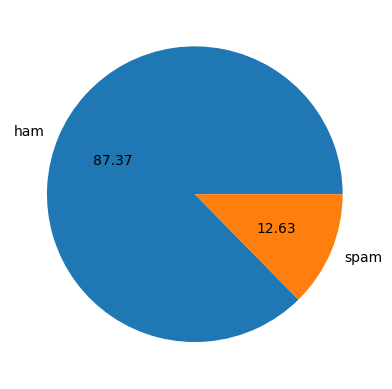

In [141]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [142]:
import nltk

In [143]:
pip install nltk

In [144]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [145]:
df['num_characters'] = df['text'].apply(len)

In [146]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [147]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [148]:
df.head()


target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [149]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [150]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [151]:
df[['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000

In [152]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

num_characters    num_words  num_sentences
count     4516.000000  4516.000000    4516.000000
mean        70.459256    17.123782       1.820195
std         56.358207    13.493970       1.383657
min          2.000000     1.000000       1.000000
25%         34.000000     8.000000       1.000000
50%         52.000000    13.000000       1.000000
75%         90.000000    22.000000       2.000000
max        910.000000   220.000000      38.000000

In [153]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

num_characters   num_words  num_sentences
count      653.000000  653.000000     653.000000
mean       137.891271   27.667688       2.970904
std         30.137753    7.008418       1.488425
min         13.000000    2.000000       1.000000
25%        132.000000   25.000000       2.000000
50%        149.000000   29.000000       3.000000
75%        157.000000   32.000000       4.000000
max        224.000000   46.000000       9.000000

In [154]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

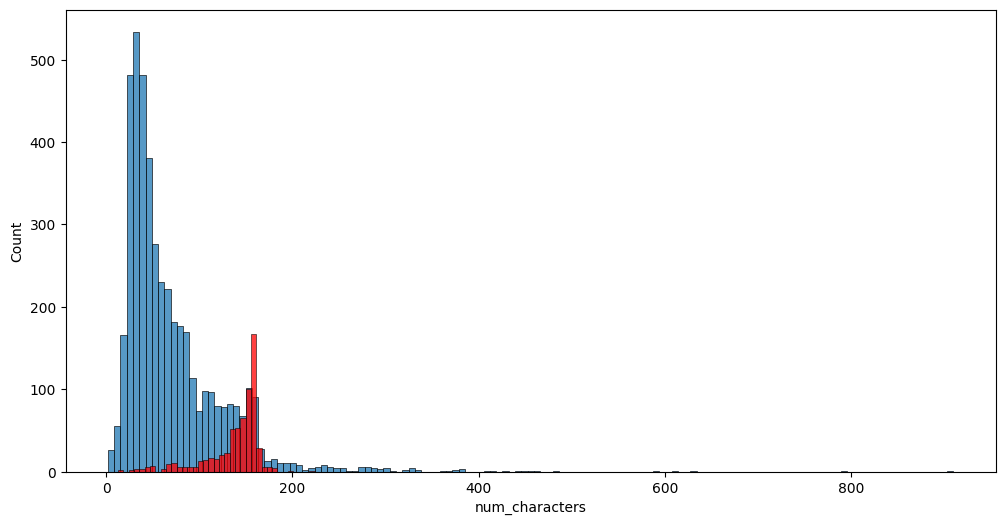

In [155]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

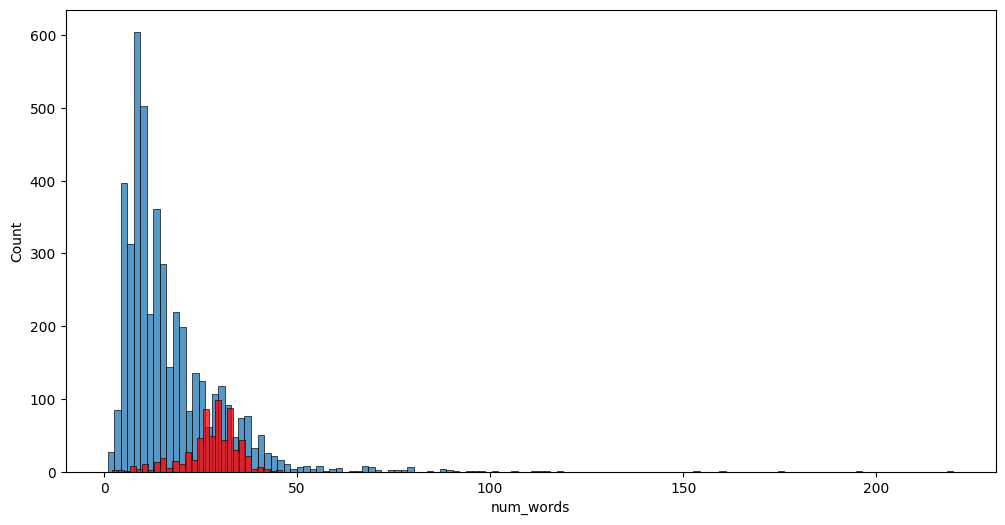

In [156]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

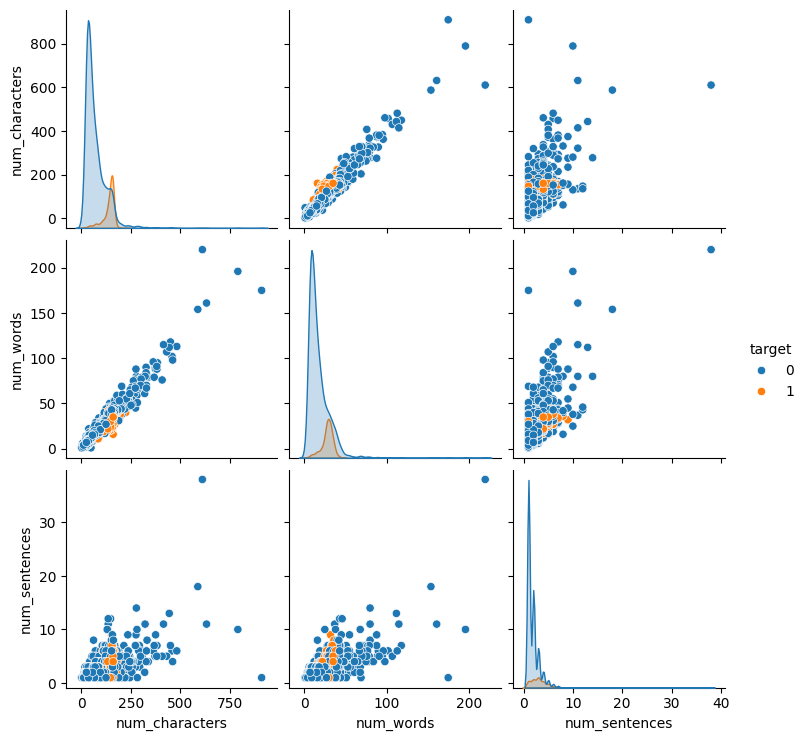

In [157]:
sns.pairplot(df,hue='target')

<Axes: >

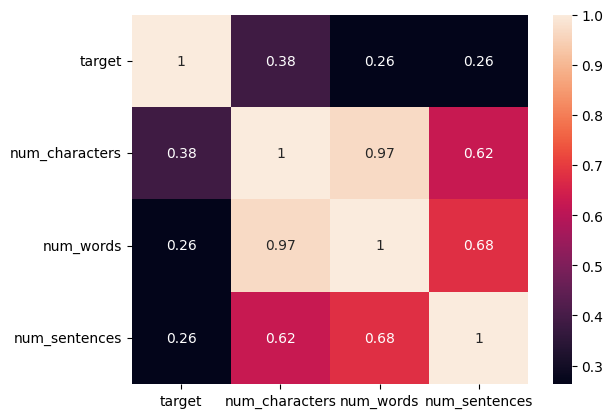

In [158]:

numerical_df = df.select_dtypes(include=['number'])

sns.heatmap(numerical_df.corr(), annot=True)

DATA PROCESSING

In [159]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

      text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

      text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

    return " ".join(y)

    transformed_text = transform_text(text)("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
    print(transformed_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [160]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [161]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [162]:
df['transformed_text'] = df['text'].apply(transform_text)

In [163]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences transformed_text  
0         24              2               go  
1          8              2               ok  
2         37              2             free  
3         13              1                u  
4         15              1              nah

In [164]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [165]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

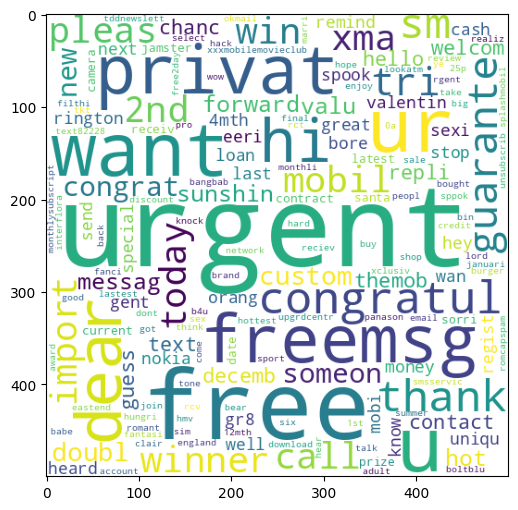

In [166]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [167]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

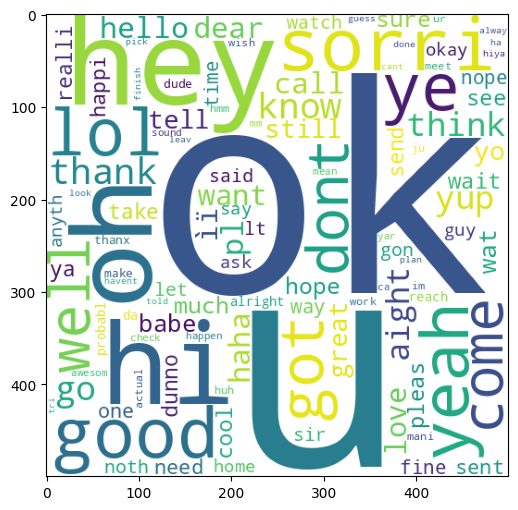

In [168]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [169]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences transformed_text  
0         24              2               go  
1          8              2               ok  
2         37              2             free  
3         13              1                u  
4         15              1              nah

In [170]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [171]:
len(spam_corpus)

653

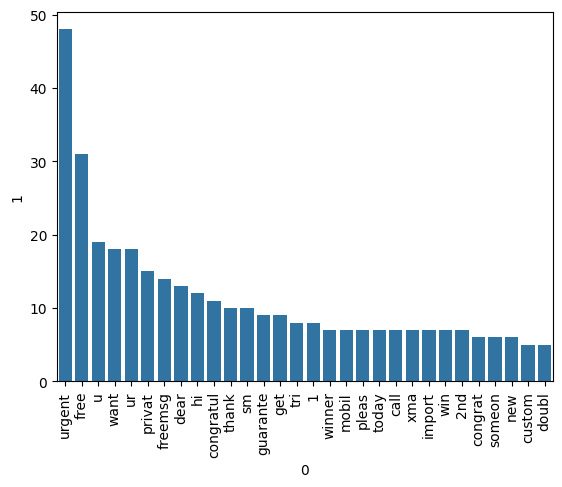

In [172]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [173]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [174]:
len(ham_corpus)

4516

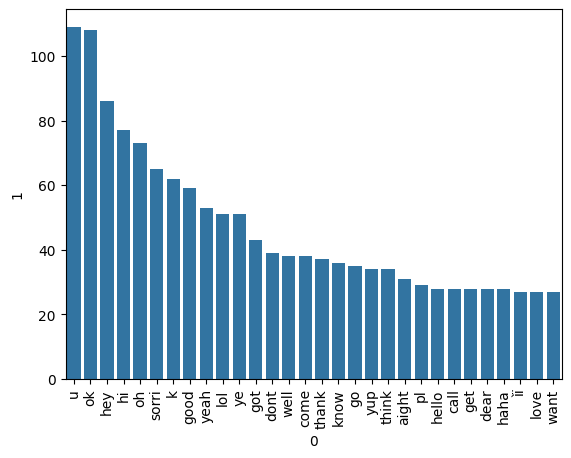

In [175]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [176]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences transformed_text  
0         24              2               go  
1          8              2               ok  
2         37              2             free  
3         13              1                u  
4         15              1              nah

Building the model


In [177]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [178]:
x= tfidf.fit_transform(df['transformed_text']).toarray()

In [179]:
x.shape

(5169, 1386)

In [180]:
y =df['target'].values

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [183]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [184]:
from sklearn.model_selection import train_test_split

# Assuming 'x' and 'y' are already defined as your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) # Adjust test_size and random_state as needed

gnb = GaussianNB()
gnb.fit(x_train, y_train) # Fit the model on the training data

y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.5939675174013921
[[598 509]
 [ 16 170]]
0.2503681885125184


In [185]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.888631090487239
[[1104    3]
 [ 141   45]]
0.9375


In [186]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.868522815158546
[[1107    0]
 [ 170   16]]
1.0


In [187]:
pip install xgboost

In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [189]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)


In [190]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'ETC': etc,
    'xgb':xgb

}

In [191]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [192]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9002320185614849, 0.8607594936708861)

In [193]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9002320185614849
Precision -  0.8607594936708861
For  KN
Accuracy -  0.888631090487239
Precision -  0.723404255319149
For  NB
Accuracy -  0.888631090487239
Precision -  0.9375
For  DT
Accuracy -  0.8793503480278422
Precision -  0.9166666666666666
For  LR
Accuracy -  0.8955916473317865
Precision -  0.8591549295774648
For  RF
Accuracy -  0.9079659706109822
Precision -  0.8018018018018018
For  AdaBoost
Accuracy -  0.897138437741686
Precision -  0.797752808988764
For  BgC
Accuracy -  0.9079659706109822
Precision -  0.8018018018018018
For  ETC
Accuracy -  0.9071925754060325
Precision -  0.8
For  xgb
Accuracy -  0.8824439288476411
Precision -  0.8541666666666666


In [194]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [195]:
performance_df

Algorithm  Accuracy  Precision
2        NB  0.888631   0.937500
3        DT  0.879350   0.916667
0       SVC  0.900232   0.860759
4        LR  0.895592   0.859155
9       xgb  0.882444   0.854167
5        RF  0.907966   0.801802
7       BgC  0.907966   0.801802
8       ETC  0.907193   0.800000
6  AdaBoost  0.897138   0.797753
1        KN  0.888631   0.723404

In [196]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [197]:
performance_df1

Algorithm   variable     value
0         NB   Accuracy  0.888631
1         DT   Accuracy  0.879350
2        SVC   Accuracy  0.900232
3         LR   Accuracy  0.895592
4        xgb   Accuracy  0.882444
5         RF   Accuracy  0.907966
6        BgC   Accuracy  0.907966
7        ETC   Accuracy  0.907193
8   AdaBoost   Accuracy  0.897138
9         KN   Accuracy  0.888631
10        NB  Precision  0.937500
11        DT  Precision  0.916667
12       SVC  Precision  0.860759
13        LR  Precision  0.859155
14       xgb  Precision  0.854167
15        RF  Precision  0.801802
16       BgC  Precision  0.801802
17       ETC  Precision  0.800000
18  AdaBoost  Precision  0.797753
19        KN  Precision  0.723404

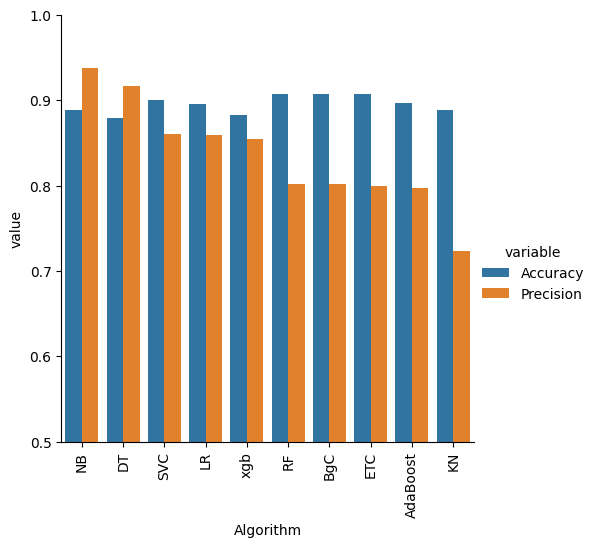

In [198]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [199]:
# changing max feature parameter of tfidf
temp_df =pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [200]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [201]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [202]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [203]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  Precision  Accuracy_max_ft_3000_x  \
0        NB  0.888631   0.937500                0.888631   
1        DT  0.879350   0.916667                0.879350   
2       SVC  0.900232   0.860759                0.900232   
3        LR  0.895592   0.859155                0.895592   
4       xgb  0.882444   0.854167                0.882444   
5        RF  0.907966   0.801802                0.907966   
6       BgC  0.907966   0.801802                0.907966   
7       ETC  0.907193   0.800000                0.907193   
8  AdaBoost  0.897138   0.797753                0.897138   
9        KN  0.888631   0.723404                0.888631   

   Precision_max_ft_3000_x  Accuracy_max_ft_3000_y  Precision_max_ft_3000_y  \
0                 0.937500                0.888631                 0.937500   
1                 0.916667                0.879350                 0.916667   
2                 0.860759                0.900232                 0.860759   
3                 0.859155                0.895592                 0.859155   
4                 0.854167                0.882444                 0.854167   
5                 0.801802                0.907966                 0.801802   
6                 0.801802                0.907966                 0.801802   
7                 0.800000                0.907193                 0.800000   
8                 0.797753                0.897138                 0.797753   
9                 0.723404                0.888631                 0.723404   

   Accuracy_scaling  Precision_scaling  
0          0.888631           0.937500  
1          0.879350           0.916667  
2          0.900232           0.860759  
3          0.895592           0.859155  
4          0.882444           0.854167  
5          0.907966           0.801802  
6          0.907966           0.801802  
7          0.907193           0.800000  
8          0.897138           0.797753  
9          0.888631           0.723404

In [204]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True) # Enable probability estimation for SVC
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [205]:
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [206]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9110595514307811
Precision 0.8736842105263158


In [207]:
estimators =[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator= RandomForestClassifier()

In [208]:
from sklearn.ensemble import StackingClassifier

In [209]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [213]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accurancy", accuracy_score(y_test,y_pred))
print("Precision", precision_score(y_test,y_pred))

Accurancy 0.9048723897911833
Precision 0.7889908256880734


In [210]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [215]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42) # Adjust test_size and random_state as needed

x_train = ["sample text 1", "sample text 2", "sample text 3"]
y_train = [0, 1, 0]

tfidf =TfidfVectorizer(lowercase =True, stop_words='english')
x_train_tfidf = tfidf.fit_transform(x_train)

mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)

